# 3. Clustering

In [2]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To visualize the data
import matplotlib.pyplot as plt

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# Regression models
import sklearn
import scipy
from scipy.stats import *
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV #split the data into training and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.metrics import r2_score, mean_squared_error

# 5-folds crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report
from sklearn.pipeline import Pipeline

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
# Libraries specific for clustering
import matplotlib.colors as mcolors
import random
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [7]:
training_set = pd.read_csv("training_set_complete1.csv")

# DA TOGLIERE UNA VOLTA CHE UNIAMO I NOTEBOOK!!!!
training_set = training_set.drop(columns=['Unnamed: 0'])


training_set['Month']=training_set['Month'].astype('category')
training_set['OperatingSystems']=training_set['OperatingSystems'].astype('category')
training_set['Browser']=training_set['Browser'].astype('category')
training_set['Region']=training_set['Region'].astype('category')
training_set['TrafficType']=training_set['TrafficType'].astype('category')
training_set['VisitorType']=training_set['VisitorType'].astype('category')
training_set['Weekend']=training_set['Weekend'].astype('category')
training_set['Revenue']=training_set['Revenue'].astype('category')


# We uniform the categories between training and test set

all_categories_browser = list(range(1,14))
all_categories_traffic_type = list(range(1,21))
training_set['Browser'] = training_set['Browser'].cat.set_categories(all_categories_browser)
training_set['TrafficType'] = training_set['TrafficType'].cat.set_categories(all_categories_traffic_type)
#training_set['Weekend'] = np.where(training_set['Weekend']=='True',1,0)

training_set = pd.get_dummies(training_set, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)
training_set

#test_set = pd.read_csv("test_set_complete.csv")
#training_set['Revenue'] = training_set['Revenue'].astype(int)
#test_set['Revenue'] = test_set['Revenue'].astype(int)
#training_set['Revenue'].value_counts()
#test_set['Revenue'].value_counts()
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_FALSO', 'Weekend_VERO']
training_set[categorical_features] = training_set[categorical_features].astype('category')
#test_set[categorical_features] = test_set[categorical_features].astype('category')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSO,Weekend_VERO
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,...,0,0,0,0,0,0,0,1,1,0
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1,4.000000,0,0.0,37,1296.942857,0.013889,0.039815,0.000000,0.8,...,0,0,0,0,0,0,0,1,1,0
4,2,132.400000,0,0.0,11,296.300000,0.000000,0.015385,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,10,130.550000,1,23.2,7,128.233333,0.006667,0.015238,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
9244,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,...,0,0,0,0,0,0,0,1,0,1
9245,7,109.500000,0,0.0,25,349.696970,0.000000,0.019048,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
9246,4,82.700000,0,0.0,26,405.283333,0.000000,0.001429,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
X_train_full = training_set.drop(columns=['Revenue'])
X_test_full = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
y_test = test_set['Revenue']

In [5]:
from sklearn.feature_selection import VarianceThreshold

# Creazione dell'oggetto VarianceThreshold e specifica della soglia di varianza
threshold = 0.001  # Soglia di varianza desiderata
variance_selector = VarianceThreshold(threshold=threshold)

# Applicazione della selezione della varianza sul dataset

X_train = X_train_full.loc[:, variance_selector.fit(X_train_full).get_support()]
columns_remaining = X_train_full.columns.tolist()

X_test = X_test_full[columns_remaining]
print(X_train.columns.tolist())

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other'

## Setting the constant parameters

In [6]:
n_clusters = 2
element_distance_metric = 'euclidean'
linkage = 'ward'

## Functions to evaluate clustering performances

### Crosscorrelation index

In [7]:
# similarity matrix
def plot_similarity_matrix(X,y,metric=element_distance_metric):
    sim = similarity_mat(X, metric=element_distance_metric)
    plot_sorted_mat(sim, y)

# incidence matrix
def plot_incidence_matrix(y_pred):
    inc = incidence_mat(y_predict)
    plot_sorted_mat(inc, y_predict)

### Internal indexes

### External Indexes

In [8]:
def get_count_nk(cluster_labels,k):
    return np.count_nonzero(cluster_labels == k)

def get_count_nj(class_labels,j):
    return np.count_nonzero(class_labels == j)

def get_count_nkj(cluster_labels,class_labels,k,j):
    return len(np.intersect1d(np.where(cluster_labels == k)[0], np.where(class_labels == j)[0]))

def get_precision(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nk(cluster_labels,k)

def get_recall(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nj(class_labels,j)

## da rivedere
def get_cluster_purity(cluster_labels,class_labels,k):
    precisions = []
    labels_in_cluster_k = np.unique(cluster_labels)
    for label in labels_in_cluster_k:
        precisions.append(get_precision(cluster_labels,class_labels,k,label))
    return max(precisions)

## da rivedere
def get_total_purity(cluster_labels,class_labels):
    purities = []
    labels_in_cluster_k = np.unique(cluster_labels)

    for cluster in labels_in_cluster_k:
        purities.append(get_cluster_purity(cluster_labels,class_labels,cluster)*(get_count_nk(cluster_labels,cluster)/len(cluster_labels)))
    return sum(purities)

def get_accuracy(cluster_labels,class_labels):
    return sum(cluster_labels == class_labels)/len(class_labels)

In [9]:
def get_cluster_metrics(cluster_labels,class_labels,model_name):
    
    accuracy = get_accuracy(cluster_labels,class_labels)
    
    cluster_label_unique = np.sort(np.unique(cluster_labels))
    class_label_unique = np.sort(np.unique(class_labels))
    
    precisions = [] # ordine: 00,01,10,11 (prima cifra: cluster, seconda cifra: classe)
    recalls = [] # ordine: 00,01,10,11 (prima cifra: cluster, seconda cifra: classe)
    
    purities = []
    
    for k in cluster_label_unique:
        for j in class_label_unique:
            precisions.append(get_precision(cluster_labels,class_labels,k,j))
        purities.append(get_cluster_purity(cluster_labels,class_labels,k))
        
    for j in class_label_unique:
        for k in cluster_label_unique:
            recalls.append(get_recall(cluster_labels,class_labels,k,j))
    
    tot_purity = get_total_purity(cluster_labels,class_labels)
    
    jaccard = sklearn.metrics.jaccard_score(class_labels, cluster_labels)
    
    data = {
        'Accuracy':[accuracy],
        'p_00':[precisions[0]],
        'p_01':[precisions[1]],
        'p_10':[precisions[2]],
        'p_11':[precisions[3]],
        'r_00':[recalls[0]],
        'r_01':[recalls[1]],
        'r_10':[recalls[2]],
        'r_11':[recalls[3]],
        'p_0':[purities[0]],
        'p_1':[purities[1]],
        'tot_purity':[tot_purity],
        'jaccard':[jaccard],
        
    }
    data = pd.DataFrame(data)
    data.rename(index={0: model_name}, inplace=True)
    return data
    #return accuracy,precisions,recalls,purities,tot_purity,jaccard
    

## PCA
Since our dataset has a lot of features, we perform PCA to reduce the dimension. We keep a number of components that explains the 95% of the variance. We first scale the numeric features.

In [10]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data X
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 
                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
                        'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 
                        'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 
                        'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 
                        'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]))
test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_features]))
train_scaled.columns = X_train[numeric_features].columns
test_scaled.columns = X_test[numeric_features].columns
X_train_scaled = pd.concat([train_scaled,X_train[categorical_features]],axis=1)
X_test_scaled = pd.concat([test_scaled,X_test[categorical_features]],axis=1)

In [11]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Compute the cumulative percentage of variance explained
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explains the 95% of the variance
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1 #27

# Riduci la dimensionalità del dataset utilizzando il numero selezionato di componenti principali
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Visual inspection of the first two PCs
Here we report the UMAP with the first and second principal component.

<AxesSubplot:>

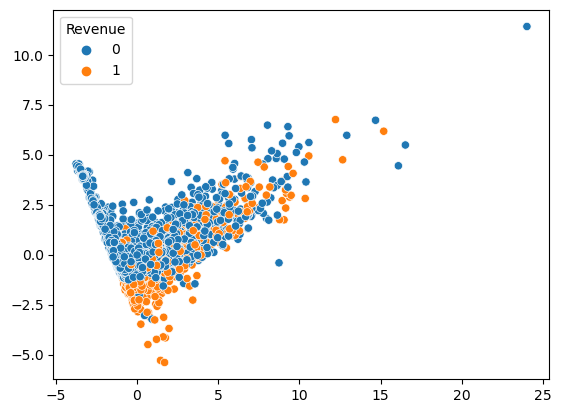

In [12]:
X0_range = (X_train_pca[:,0].min(), X_train_pca[:,0].max())
X1_range = (X_train_pca[:,1].min(), X_train_pca[:,1].max())

sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, marker='o')
#sns.scatterplot(X_test_pca[:,0], X_test_pca[:,1], hue=y_test, marker='^')


## Hierarchical clustering

### Agglomerative clustering

In [13]:
model_agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=element_distance_metric, linkage=linkage)
labels_agglomerative = model_agglomerative.fit_predict(X_train_pca)


In [14]:
metrics_agglomerative = get_cluster_metrics(labels_agglomerative,y_train,'Agglomerative')
metrics_agglomerative

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.748594,0.857739,0.142261,0.778689,0.221311,0.841809,0.158191,0.756419,0.243581,0.857739,0.778689,0.844183,0.131166


## K-means

In [15]:
model_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)             
labels_kmeans = model_kmeans.fit_predict(X_train_pca)

In [16]:
metrics_kmeans = get_cluster_metrics(labels_kmeans,y_train,'K-means')
metrics_kmeans

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
K-means,0.778979,0.866463,0.133537,0.71769,0.28231,0.872678,0.127322,0.728661,0.271339,0.866463,0.71769,0.844183,0.160575


## K-medoids


In [17]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import gower

# QUESTA PARTE DEL CODICE è DA RIELABORARE, è MOOOLTO SCOPIAZZATA e fatta male

#data, _ = make_blobs(n_samples=X_train_pca.shape[0], centers=2, random_state=42)
data=pd.read_csv("data/training_set_online_shoppers_intention.csv")
data = data.drop(columns=['Revenue','Unnamed: 0'])
data.loc[:,'ExitRates'] = X_train['ExitRates']
categorical_cols = data.columns[10:17]
for col in categorical_cols:
    data.loc[:,col] = data[col].astype('category')
gower_mat = gower.gower_matrix(data, cat_features = [False,False,False,False,False,False,False,False,False,False,
                                                    True,True,True,True,True,True,True])

#distance_matrix = pairwise_distances(data, metric='euclidean')
#gower_dist = gower_matrix(data)
model_kmedoids = KMedoids(n_clusters=2, random_state=0, metric='precomputed')
#gower_mat = gower.gower_matrix(X_train_pca)
labels_kmedoids = model_kmedoids.fit_predict(gower_mat)


In [18]:
metrics_kmedoids = get_cluster_metrics(labels_kmedoids,y_train,'K-medoids')
metrics_kmedoids

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
K-medoids,0.452422,0.780757,0.219243,0.915196,0.084804,0.488536,0.511464,0.743234,0.256766,0.780757,0.915196,0.844183,0.06809


## DBSCAN

In [19]:
model_DBSCAN = DBSCAN(eps=20, min_samples=10)
labels_DBSCAN = model_DBSCAN.fit_predict(X_train_pca)

In [20]:
metrics_DBSCAN = get_cluster_metrics(labels_kmedoids,y_train,'DBSCAN')
metrics_DBSCAN

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
DBSCAN,0.452422,0.780757,0.219243,0.915196,0.084804,0.488536,0.511464,0.743234,0.256766,0.780757,0.915196,0.844183,0.06809


## Comparison between the algorithms

In [21]:
metrics_df = pd.DataFrame()
metrics_df = pd.concat([metrics_agglomerative,metrics_kmeans,metrics_kmedoids,metrics_DBSCAN],axis=0)
metrics_df

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.748594,0.857739,0.142261,0.778689,0.221311,0.841809,0.158191,0.756419,0.243581,0.857739,0.778689,0.844183,0.131166
K-means,0.778979,0.866463,0.133537,0.717690,0.282310,0.872678,0.127322,0.728661,0.271339,0.866463,0.717690,0.844183,0.160575
K-medoids,0.452422,0.780757,0.219243,0.915196,0.084804,0.488536,0.511464,0.743234,0.256766,0.780757,0.915196,0.844183,0.068090
DBSCAN,0.452422,0.780757,0.219243,0.915196,0.084804,0.488536,0.511464,0.743234,0.256766,0.780757,0.915196,0.844183,0.068090


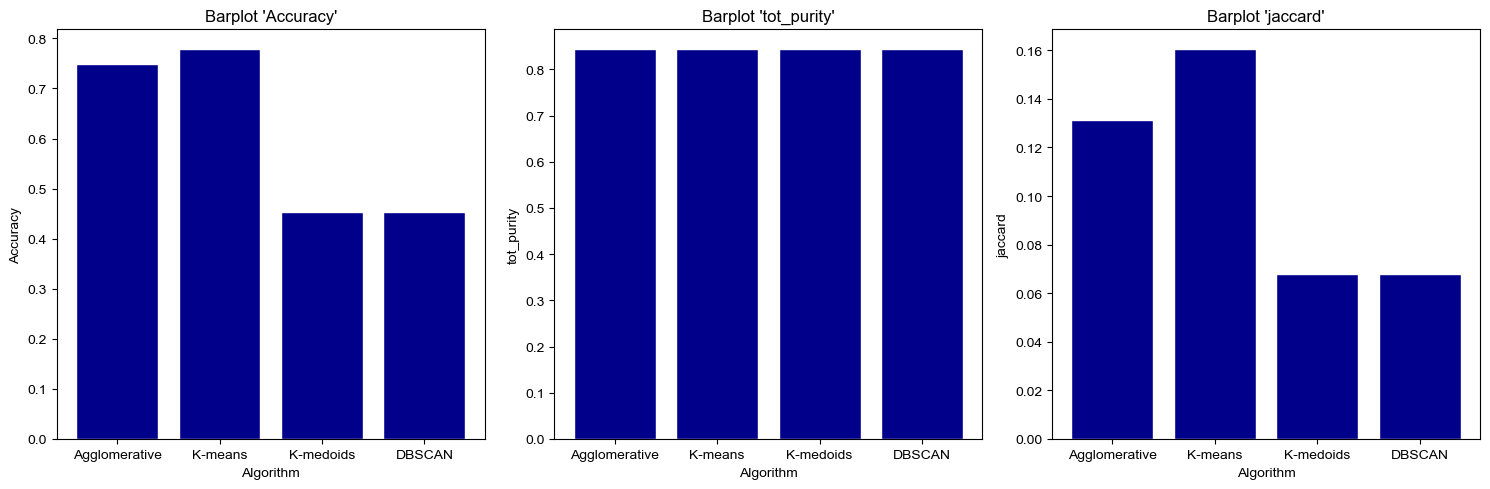

In [22]:
columns = ['Accuracy', 'tot_purity', 'jaccard']

num_cols = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

sns.set_style('whitegrid')
palette = 'Set2'

for i, col in enumerate(columns):
    values = metrics_df.loc[:,col]
    axes[i].bar(metrics_df.index, values, color="darkblue")
    axes[i].set_title(f"Barplot '{col}'")
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show();
